Created on July 7th, 2022

Last edit on July 7th, 2022

# Estimation of effective tunneling in a triangular lattice shaken by frequency modulation

<div style="text-align: right;">
<font size="4">Editor: Hideki Ozawa</font>
</div>

---

Reference.)

[1] [A.Zenesini *et. al.*, "Tunneling control and localization for Bose-Einstein condensates in a frequency modulated optical lattice
", arXiv (2009)](https://arxiv.org/abs/0912.1241)

The expressions for the frequency modulations for triangular lattice beams:
\begin{eqnarray}
\delta \nu_1 (t) &=& 0\\
\delta \nu_2 (t) &=&  +\nu_x {\rm {sin}}(\Omega t) + \nu_y {\rm{cos}}(\Omega t) = \sqrt{\nu_x^2 +\nu_y^2} {\rm{sin}}(\Omega t + \alpha) \\
\delta \nu_3 (t) &=& -\nu_x {\rm {sin}}(\Omega t) + \nu_y {\rm{cos}}(\Omega t) =\sqrt{\nu_x^2 +\nu_y^2} {\rm{sin}}(\Omega t + \pi - \alpha)  \\
\alpha &=& \rm{arcsin}\left(\frac{\nu_y}{\sqrt{\nu_x^2+\nu_y^2}} \right)
\end{eqnarray}
The notation for the effective tunneling processes:
\begin{eqnarray}
J &\equiv& J_{21}^{\rm{eff}} \\
J' &\equiv& J_{32}^{\rm{eff}}  = J_{13}^{\rm{eff}} \\
J &=& {\rm{J_{B0}}} (K)J^{\rm{bare}}\\
J' &=& {\rm{J_{B0}}} (K')J^{\rm{bare}}\\
K &=& \frac{ma^2}{\hbar} \nu_y \\
K' &=& \frac{ma^2}{2\hbar} \sqrt{9 \nu_x^2 + \nu_y^2}
\end{eqnarray}
, where $ {\rm{J_{B0}}} $ means the 0-th order Bessel function of the first kind, $a = \frac{2}{3}\lambda$ the lattice constant, $m$ the atomic mass, and $\hbar$ the reduced Plant constant, respectively.

In [2]:
import numpy as np
print('numpy: '+np.version.full_version)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.animation as animation
import matplotlib
print('matplotlib: '+matplotlib.__version__)
from scipy.constants import * 
import matplotlib.pyplot as plt
from scipy.special import jv
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable

numpy: 1.19.2
matplotlib: 3.3.2


In [3]:
# lambda_L = 830*10**(-9) #[m] wavelength of triangular lattice beam in Segstock group 
lambda_L=1064*10**(-9) #[m]QMBD
h_bar = h/(2*np.pi) #Converted Plank constant
mrb = 87*10**(-3)/N_A #[kg] atom mass of 87Rb
a = 2/3*lambda_L

In [4]:
vy_list = np.linspace(0, 40,100)
K_list = mrb*a**2/h_bar*vy_list*10**3
Jv_list = jv(0, K_list)

x = np.linspace(0,25, 100)
y = np.linspace(0,40, 100)
X, Y = np.meshgrid(x, y)
Z = list(map(lambda vx, vy: jv(0,  mrb*a**2/(2*h_bar)*10**3*np.sqrt(9*vx**2+vy**2)), X,Y))

Text(0.5, 1.0, "$J'/J^{bare}$")

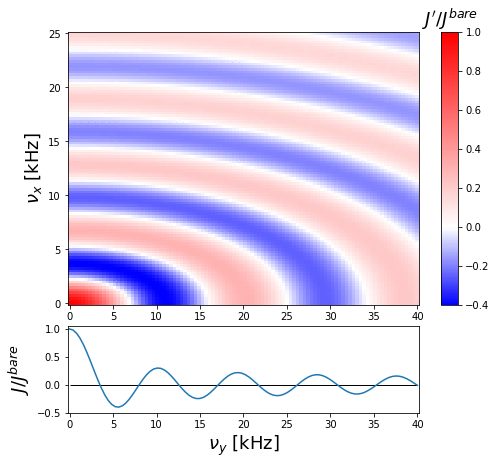

In [7]:
norm = mcolors.TwoSlopeNorm( vcenter=0.0, vmin=-0.4, vmax=1 )

fig =plt.figure(figsize=[7,7])
ax1 = fig.add_subplot(1,1,1)
mappable = ax1.pcolormesh(Y,X,Z, cmap='bwr', norm=norm, shading='Auto') 
ax1.set_ylabel(r'$\nu_{x}$ [kHz]', size=18)
divider1 = make_axes_locatable(ax1)
ax1X = divider1.append_axes("bottom", 1.2, pad=0.3, sharex=ax1)
ax1X.plot(vy_list,Jv_list)
ax1X.set_ylabel(r"$J / J^{bare}$", size=18)
ax1X.set_xlabel(r'$\nu_{y}$ [kHz]',size=18)
ax1X.set_ylim(-0.5, 1.05)
ax1X.hlines(y=0,xmin=0, xmax=40, colors='black', linewidths=1)
ax_cb1 = divider1.append_axes("right",size="5%",pad=0.3)
pp=fig.colorbar(mappable,cax=ax_cb1)
pp.ax.set_title(r"$J'/J^{bare}$", fontsize=18)

In [8]:
controlVoltageToAM = 2.56 #[V] control voltage from NI-DAQ to WF1968 mod. in via buffer amp
modulationSignalVpp = 8 #[V] Amplitude of modulation singal
bufferAmpForAM = 1/8 # gain of buffer amp for modulatin sinal
FMdeviation = 10*1e3 #[Hz] FM deviation used in RF source
bufferAmpForFM = 1/4 # gain of buffer amp for RF source

In [10]:
freqModAmplitude = (controlVoltageToAM*bufferAmpForAM+1)/2*modulationSignalVpp*bufferAmpForFM/2*FMdeviation #[Hz]
vx = freqModAmplitude*np.sin(np.pi/6)
vy = freqModAmplitude*np.sin(np.pi/3)

In [12]:
k=mrb*a**2/h_bar*vy
kp = mrb*a**2/(2*h_bar)*np.sqrt(9*vx**2+vy**2)
j = jv(0,k)
jp = jv(0,kp)
amp = np.sqrt(vx**2+vy**2)
alpha = np.arcsin(vy/amp)
print('K=%.02f'%(k))
print('Kp=%.02f'%(kp))
print('J/J_bare=%.02f'%(j))
print('Jp/J_bare=%.02f'%(jp))
print('Amplitude=%.02f'%(amp)+"[kHz]")
print('theta = %.02f'%(alpha*180/np.pi)+"[degree]")

K=3.94
Kp=3.94
J/J_bare=-0.40
Jp/J_bare=-0.40
Amplitude=6600.00[kHz]
theta = 60.00[degree]


In [13]:
controlVoltage_list = np.linspace(-8,8,100)
freqModAmplitude_list = (controlVoltage_list*bufferAmpForAM+1)/2*modulationSignalVpp*bufferAmpForFM/2*FMdeviation #[Hz]
vx_list = freqModAmplitude_list*np.sin(np.pi/6)
vy_list = freqModAmplitude_list*np.sin(np.pi/3)
k_list = mrb*a**2/h_bar*vy_list
j_list = jv(0,k_list)

Text(0, 0.5, 'Effective tunneling / Bare tunneling')

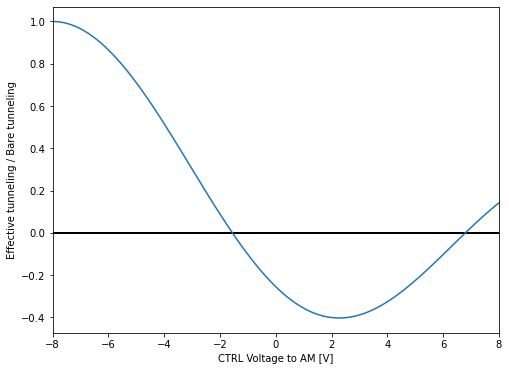

In [17]:
fig = plt.figure(figsize=[8,6])
plt.plot(controlVoltage_list,j_list)
plt.hlines(y=0,xmin=np.min(controlVoltage_list), xmax=np.max(controlVoltage_list), colors='black', linewidths=2)
plt.xlim(np.min(controlVoltage_list),np.max(controlVoltage_list))
plt.xlabel('CTRL Voltage to AM [V]')
plt.ylabel('Effective tunneling / Bare tunneling')